In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
    # Read data into DataFrame from CSV file
    # cyclone_df = pd.read_csv("Cyclone_ML.csv")
    cyclone_df = pd.read_csv("data/Cyclone_ML.csv")

    # Select features for machine learning and assign to X
    selected_features = cyclone_df[["SURFACE_CODE",	"CYC_TYPE", "LAT", "LON", "CENTRAL_PRES", "MAX_WIND_SPD", "CENTRAL_INDEX (CI)", "WAVE_HEIGHT"]]
    # selected_features = cyclone_df[["CYC_TYPE", "LAT", "LON", "CENTRAL_PRES", "MAX_WIND_SPD", "CENTRAL_INDEX (CI)", "WAVE_HEIGHT"]]
    X = selected_features

    # Set y to compass direction of cyclone based on wind direction degree
    y = cyclone_df["WIND_COMPASS"]
    # y = cyclone_df["MAX_REP_WIND_DIR"]
 
    print(X.shape, y.shape)

(1692, 8) (1692,)


In [7]:
X

,SURFACE_CODE,CYC_TYPE,LAT,LON,CENTRAL_PRES,MAX_WIND_SPD,CENTRAL_INDEX (CI),WAVE_HEIGHT
0,3.0,40.0,-19.00,146.40,952.0,46.3,5.051994,11.079868
1,1.0,20.0,-11.00,92.60,1001.0,12.9,2.064005,3.337484
2,1.0,20.0,-11.10,93.10,1002.0,12.9,1.950454,3.093691
3,1.0,20.0,-11.10,94.20,1003.0,12.9,1.829259,2.838769
4,1.0,20.0,-11.10,94.60,1000.0,12.9,2.171169,3.571799
...,...,...,...,...,...,...,...,...
1687,2.0,30.0,-14.30,126.40,986.0,20.6,3.306407,6.276868
1688,4.0,21.0,-12.73,130.61,999.0,20.6,2.272897,3.797903
1689,2.0,30.0,-12.54,130.72,993.0,18.0,2.801605,5.026852
1690,2.0,30.0,-12.41,130.99,995.0,18.0,2.638106,4.637562


In [5]:
y

0       SE
1        E
2        E
3        S
4       SW
        ..
1687     W
1688     N
1689    SW
1690    SW
1691    SW
Name: WIND_COMPASS, Length: 1692, dtype: object

In [8]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.998/0.307
k: 3, Train/Test Score: 0.550/0.293
k: 5, Train/Test Score: 0.495/0.279
k: 7, Train/Test Score: 0.438/0.300
k: 9, Train/Test Score: 0.396/0.279
k: 11, Train/Test Score: 0.368/0.277
k: 13, Train/Test Score: 0.345/0.267
k: 15, Train/Test Score: 0.333/0.262


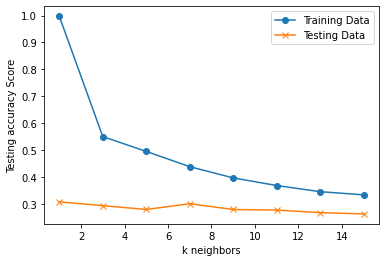

In [10]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 16, 2), train_scores, marker='o')
plt.plot(range(1, 16, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend(["Training Data", "Testing Data"], loc="best")
plt.show()

In [11]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Train Acc: %.3f' % knn.score(X_train_scaled, y_train))
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Train Acc: 0.368
k=11 Test Acc: 0.277
